### Import Libraries and Read in Data

In [46]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objects as go
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
# Read in Data
df = pd.read_csv("../input/math301-final-project-data/encoded_data.csv", index_col=0)
train = pd.read_csv("../input/math301-final-project-data/train.csv", index_col=0)
test = pd.read_csv("../input/math301-final-project-data/test.csv", index_col=0)

### Random Forest - Baseline

In [3]:
# Split train and test into X and Y vectors

X_train = train.drop(labels=['price'],axis=1).values
y_train = train[['price']].values

X_test = test.drop(labels=['price'],axis=1).values
y_test = test[['price']].values

In [4]:
# RandomForest Regressor

rf = RandomForestRegressor(n_estimators=50)

# print("RF Cross Validation Median Absolute Error: {}".format(round(-cross_val_score(rf, X_train, y_train.ravel(), cv=5, scoring='neg_median_absolute_error').mean(),2)))
# RF Cross Validation Median Absolute Error: 1.36

In [10]:
%%time
print("RF Cross Validation Median Absolute Error: {}".format(round(-cross_val_score(rf, X_train, y_train.ravel(), cv=5, scoring='neg_median_absolute_error').mean(),2)))

RF Cross Validation Median Absolute Error: 1.38
CPU times: user 3min 13s, sys: 758 ms, total: 3min 14s
Wall time: 3min 14s


In [6]:
%%time
# Fit Data
rf.fit(X_train,y_train.ravel())

CPU times: user 46.1 s, sys: 122 ms, total: 46.2 s
Wall time: 46.3 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [7]:
%%time
# Save RF Baseline predictions
rf_pred = rf.predict(X_test)

CPU times: user 400 ms, sys: 1.01 ms, total: 401 ms
Wall time: 398 ms


In [12]:
print("RF Predicton Median Absolute Error: {}".format(round(median_absolute_error(y_test, rf_pred),2 )))
print("RF Predicton Mean Absolute Error: {}".format(round(mean_absolute_error(y_test, rf_pred),2 )))
print("RF Predicton R Squared: {}".format(round(r2_score(y_test, rf_pred),2 )))
print("RF Predicton Mean Squared Error: {}".format(round(mean_squared_error(y_test, rf_pred),2 )))

RF Predicton Median Absolute Error: 0.28
RF Predicton Mean Absolute Error: 1.34
RF Predicton R Squared: 1.0
RF Predicton Mean Squared Error: 28.28


[Reference]

In Previous Literature:

Best model used SVR with the following cross validation errors:

- Mean AE 1.3179
- MSE 1.1584
- R^2 0.6901

### Feature Importance from Random Forest

In [53]:
trace = go.Scatter(
    y = rf.feature_importances_,
    x = train.drop(labels=['price'],axis=1).columns.tolist(),
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = train.drop(labels=['price'],axis=1).columns.tolist()
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig,filename='rf fi scatter')

Features that had "0" importance were:

- year_2018, year_2019, year_2020
- room_type_Hotel room

Top 10 Features that were important:

- minimum_nights
- longitude
- latitude
- room_type_Private room
- last_review_month
- avaliability_365
- calculated_host_listings_count
- last_review_day
- name_cc
- reviews_per_month

### RF with Selected Features by RF Feature Importance

I will drop features that were 0 in feature importance and see how RF performs

In [85]:
# Drop features with feature importance 0

X_train = train.drop(labels=['price','year_2018','year_2020', 'room_type_Hotel room','year_2019'],axis=1).values
y_train = train[['price']].values

X_test = test.drop(labels=['price','year_2018','year_2020', 'room_type_Hotel room','year_2019'],axis=1).values
y_test = test[['price']].values

In [86]:
# RandomForestRegressor Estimator

rf_fi_fs = RandomForestRegressor(n_estimators=50)

In [67]:
%%time
print("RF FI FS Cross Validation Median Absolute Error: {}".format(round(-cross_val_score(rf_fi_fs, X_train, y_train.ravel(), cv=5, scoring='neg_median_absolute_error').mean(),4)))

RF FI FS Cross Validation Median Absolute Error: -0.0
CPU times: user 1min 42s, sys: 29.1 ms, total: 1min 42s
Wall time: 1min 42s


In [87]:
%%time
# Fit Feature Selected Data ( Feature Importance )

rf_fi_fs.fit(X_train,y_train.ravel())

CPU times: user 45.8 s, sys: 45.6 ms, total: 45.9 s
Wall time: 45.9 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [88]:
# Save Predictions

rf_fi_fs_pred = rf_fi_fs.predict(X_test)

In [89]:
print("RF FI FS Predicton Median Absolute Error: {}".format(round(median_absolute_error(y_test, rf_fi_fs_pred),5)))
print("RF FI FS Predicton Mean Absolute Error: {}".format(round(mean_absolute_error(y_test, rf_fi_fs_pred),5)))
print("RF FI FS Predicton R Squared: {}".format(round(r2_score(y_test, rf_fi_fs_pred),5)))
print("RF FI FS Predicton Mean Squared Error: {}".format(round(mean_squared_error(y_test, rf_fi_fs_pred),5)))

RF FI FS Predicton Median Absolute Error: 0.28
RF FI FS Predicton Mean Absolute Error: 1.31455
RF FI FS Predicton R Squared: 0.9993
RF FI FS Predicton Mean Squared Error: 18.76962


### Blending: RF Baseline + Feature Selected RF with Feature Importance

In [111]:
rf_rf_fi_fs_blend_pred = rf_fi_fs_pred * 0.65 + rf_pred * 0.35

In [112]:
print("RF & RF FI FS Blend Predicton Median Absolute Error: {}".format(round(median_absolute_error(y_test, rf_rf_fi_fs_blend_pred),5)))
print("RF & RF FI FS Blend Predicton Mean Absolute Error: {}".format(round(mean_absolute_error(y_test, rf_rf_fi_fs_blend_pred),5)))
print("RF & RF FI FS Blend Predicton R Squared: {}".format(round(r2_score(y_test, rf_rf_fi_fs_blend_pred),5)))
print("RF & RF FI FS BlendPredicton Mean Squared Error: {}".format(round(mean_squared_error(y_test, rf_rf_fi_fs_blend_pred),5)))

RF & RF FI FS Blend Predicton Median Absolute Error: 0.399
RF & RF FI FS Blend Predicton Mean Absolute Error: 1.26426
RF & RF FI FS Blend Predicton R Squared: 0.99943
RF & RF FI FS BlendPredicton Mean Squared Error: 15.47774


As you increase weights for the baseline RF, Test MSE and Test Mean Absolute Error decreases while the Median Absolute Error increases

### Feature Selection with Lasso + Lasso, Ridge, ElasticNet

In [13]:
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
coef = pd.Series(lasso.coef_, index = train.drop(labels=['price'],axis=1).columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 22 variables and eliminated the other 5 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

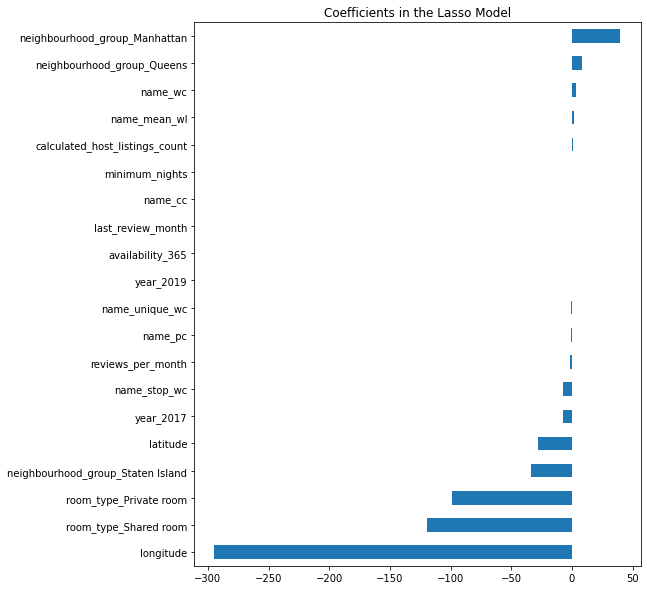

In [14]:
lasso_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
lasso_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [15]:
# Drop features with coefficient estimates of 0 by Lasso

X_train = train.drop(labels=['price','minimum_nights','name_cc','last_review_month','availability_365','year_2019'],axis=1).values
y_train = train[['price']].values

X_test = test.drop(labels=['price','minimum_nights','name_cc','last_review_month','availability_365','year_2019'],axis=1).values
y_test = test[['price']].values

In [16]:
# Scale Data as linear models benefits from feature scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [17]:
lasso = Lasso(alpha=0.1)

print("Lasso Cross Validation MSE: {}".format(round(-cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean(),2)))
print("Lasso Cross Validation Median Absolute Error: {}".format(round(-cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_median_absolute_error').mean(),2)))
print("Lasso Cross Validation Mean Absolute Error: {}".format(round(-cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean(), 2)))
print("Lasso Cross Validation R-Squared: {}".format(round(-cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2').mean(), 2)))

lasso.fit(X_train,y_train)

print("Lasso Predicton MSE: {}".format(round(mean_squared_error(y_test,lasso.predict(X_test)), 2 )))
print("Lasso Predicton Median Absolute Error: {}".format(round(median_absolute_error(y_test, lasso.predict(X_test)),2 )))
print("Lasso Predicton Mean Absolute Error: {}".format(round(mean_absolute_error(y_test, lasso.predict(X_test)), 2)))
print("Lasso Predicton R-Squared: {}".format(round(r2_score(y_test, lasso.predict(X_test)), 2 )))

Lasso Cross Validation MSE: 24298.76
Lasso Cross Validation Median Absolute Error: 30.31
Lasso Cross Validation Mean Absolute Error: 50.56
Lasso Cross Validation R-Squared: -0.14
Lasso Predicton MSE: 23154.69
Lasso Predicton Median Absolute Error: 30.39
Lasso Predicton Mean Absolute Error: 50.1
Lasso Predicton R-Squared: 0.14


In [18]:
ridge = Ridge(alpha=22.0)

print("Ridge Cross Validation MSE: {}".format(round(-cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean(),2)))
print("Ridge Cross Validation Median Absolute Error: {}".format(round(-cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_median_absolute_error').mean(),2)))
print("Ridge Cross Validation Mean Absolute Error: {}".format(round(-cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean(), 2)))
print("Ridge Cross Validation R-Squared: {}".format(round(-cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2').mean(), 2)))

ridge.fit(X_train,y_train)

print("Ridge Predicton MSE: {}".format(round(mean_squared_error(y_test,ridge.predict(X_test)), 2 )))
print("Ridge Predicton Median Absolute Error: {}".format(round(median_absolute_error(y_test, ridge.predict(X_test)),2 )))
print("Ridge Predicton Mean Absolute Error: {}".format(round(mean_absolute_error(y_test, ridge.predict(X_test)), 2)))
print("Ridge Predicton R-Squared: {}".format(round(r2_score(y_test, ridge.predict(X_test)), 2 )))

Ridge Cross Validation MSE: 24297.55
Ridge Cross Validation Median Absolute Error: 30.34
Ridge Cross Validation Mean Absolute Error: 50.61
Ridge Cross Validation R-Squared: -0.14
Ridge Predicton MSE: 23153.44
Ridge Predicton Median Absolute Error: 30.49
Ridge Predicton Mean Absolute Error: 50.15
Ridge Predicton R-Squared: 0.14


In [19]:
# ElasticNet

en = ElasticNet(alpha=1.6612244897959183, copy_X=True, fit_intercept=True,
           l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

print("ElasticNet Cross Validation MSE: {}".format(round(-cross_val_score(en, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean(),2)))
print("ElasticNet Cross Validation Median Absolute Error: {}".format(round(-cross_val_score(en, X_train, y_train, cv=5, scoring='neg_median_absolute_error').mean(),2)))
print("ElasticNet Cross Validation Mean Absolute Error: {}".format(round(-cross_val_score(en, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean(), 2)))
print("ElasticNet Cross Validation R-Squared: {}".format(round(-cross_val_score(en, X_train, y_train, cv=5, scoring='r2').mean(), 2)))

en.fit(X_train,y_train)

print("ElasticNet Predicton MSE: {}".format(round(mean_squared_error(y_test,en.predict(X_test)), 2 )))
print("ElasticNet Predicton Median Absolute Error: {}".format(round(median_absolute_error(y_test, en.predict(X_test)),2 )))
print("ElasticNet Predicton Mean Absolute Error: {}".format(round(mean_absolute_error(y_test, en.predict(X_test)), 2)))
print("ElasticNet Predicton R-Squared: {}".format(round(r2_score(y_test, en.predict(X_test)), 2 )))

ElasticNet Cross Validation MSE: 24360.83
ElasticNet Cross Validation Median Absolute Error: 29.93
ElasticNet Cross Validation Mean Absolute Error: 50.34
ElasticNet Cross Validation R-Squared: -0.14
ElasticNet Predicton MSE: 23210.58
ElasticNet Predicton Median Absolute Error: 29.94
ElasticNet Predicton Mean Absolute Error: 49.89
ElasticNet Predicton R-Squared: 0.14


In [20]:
# Blending Prediction

lasso_ridge_en_pred_blend = lasso.predict(X_test) * 0.1+ ridge.predict(X_test).reshape(26907,) * 0.1 + en.predict(X_test) * 0.8

In [21]:
# Blending

print("Blend Predicton MSE: {}".format(round(mean_squared_error(y_test, lasso_ridge_en_pred_blend),2 )))
print("Blend Predicton Median Absolute Error: {}".format(round(median_absolute_error(y_test, lasso_ridge_en_pred_blend),2 )))
print("Blend Predicton Mean Absolute Error: {}".format(round(mean_absolute_error(y_test, lasso_ridge_en_pred_blend),2 )))
print("Blend Predicton R-Squared: {}".format(round(r2_score(y_test, lasso_ridge_en_pred_blend),2 )))

Blend Predicton MSE: 23189.66
Blend Predicton Median Absolute Error: 29.9
Blend Predicton Mean Absolute Error: 49.85
Blend Predicton R-Squared: 0.14


### GradientBoostingRegressor - Baseline

In [30]:
# Split train and test into X and Y vectors

X_train = train.drop(labels=['price'],axis=1).values
y_train = train[['price']].values

X_test = test.drop(labels=['price'],axis=1).values
y_test = test[['price']].values

In [31]:
# GradientBoostingRegressor Estimator

gbr = GradientBoostingRegressor(n_estimators=50)

In [35]:
# %%time
# print("RF Cross Validation Median Absolute Error: {}".format(round(-cross_val_score(gbr, X_train, y_train.ravel(), cv=5, scoring='neg_median_absolute_error').mean(),2)))

In [32]:
%%time
# Fit Data
gbr.fit(X_train,y_train.ravel())

CPU times: user 11.5 s, sys: 6 ms, total: 11.5 s
Wall time: 11.5 s


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
%%time
# Save gbr Baseline predictions

gbr_pred = gbr.predict(X_test)

CPU times: user 26.7 ms, sys: 60 µs, total: 26.7 ms
Wall time: 26.5 ms


In [36]:
print("GBR Predicton Median Absolute Error: {}".format(round(median_absolute_error(y_test, gbr_pred),2 )))
print("GBR Predicton Mean Absolute Error: {}".format(round(mean_absolute_error(y_test, gbr_pred),2 )))
print("GBR Predicton R Squared: {}".format(round(r2_score(y_test, gbr_pred),2 )))
print("GBR Predicton Mean Squared Error: {}".format(round(mean_squared_error(y_test, gbr_pred),2 )))

GBR Predicton Median Absolute Error: 24.75
GBR Predicton Mean Absolute Error: 44.08
GBR Predicton R Squared: 0.48
GBR Predicton Mean Squared Error: 14002.13


### RF Baseline on Features Selected by Lasso

In [37]:
# Drop features with coefficient estimates of 0 by Lasso

X_train = train.drop(labels=['price','minimum_nights','name_cc','last_review_month','availability_365','year_2019'],axis=1).values
y_train = train[['price']].values

X_test = test.drop(labels=['price','minimum_nights','name_cc','last_review_month','availability_365','year_2019'],axis=1).values
y_test = test[['price']].values

In [38]:
# RandomForestRegressor Estimator

rf_fs = RandomForestRegressor(n_estimators=50)

In [39]:
# %%time
# print("RF Cross Validation Median Absolute Error: {}".format(round(-cross_val_score(gbr, X_train, y_train.ravel(), cv=5, scoring='neg_median_absolute_error').mean(),2)))

In [40]:
%%time
# Fit Feature Selected Data

rf_fs.fit(X_train,y_train.ravel())

CPU times: user 35.8 s, sys: 143 ms, total: 35.9 s
Wall time: 35.9 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [41]:
%%time
# Save RF Feature Selected by Lasso - predictions

rf_fs_pred = rf_fs.predict(X_test)

CPU times: user 367 ms, sys: 969 µs, total: 368 ms
Wall time: 366 ms


In [42]:
print("RF FS Predicton Median Absolute Error: {}".format(round(median_absolute_error(y_test, rf_fs_pred),2 )))
print("RF FS Predicton Mean Absolute Error: {}".format(round(mean_absolute_error(y_test, rf_fs_pred),2 )))
print("RF FS Predicton R Squared: {}".format(round(r2_score(y_test, rf_fs_pred),2 )))
print("RF FS Predicton Mean Squared Error: {}".format(round(mean_squared_error(y_test, rf_fs_pred),2 )))

RF FS Predicton Median Absolute Error: 0.3
RF FS Predicton Mean Absolute Error: 1.4
RF FS Predicton R Squared: 1.0
RF FS Predicton Mean Squared Error: 28.56
